In [164]:
import numpy as np

# Number of RIS elements
NUMBER_OF_ELEMENTS = 100



# Constants
P_bs = 1
h_V = 1.0  # Vertical channel gain (might not be needed in this context anymore)
sigma_k = 0.1  # Noise level
Pr = 0.9  # Received power at the RIS elements (assuming this is power from base station)

# Horizontal channel gains from AP to each RIS element (random values representing the channel conditions)
Channel_coefficient_AP_to_RIS = np.random.rand(NUMBER_OF_ELEMENTS)

# Horizontal channel gains from each RIS element to the user (random values representing the channel conditions)
Channel_coefficient_RIS_to_User = np.random.rand(NUMBER_OF_ELEMENTS)
sigma_k_ = sigma_k * 10

# Reflection coefficients for RIS elements (random values between 0 and 1)
reflection_coefficients = np.random.uniform(0.8, 1.0, NUMBER_OF_ELEMENTS)
# Energy harvesting coefficients for RIS elements (random values between 0.85 and 1.0)
energy_harvesting_coefficients = np.random.uniform(0.7, 1.0, NUMBER_OF_ELEMENTS)

# Function to calculate energy harvested (Eh) for an RIS element
def calculate_energy_harvested(n, h_H):
    return n * Pr * h_H**2

# Function to calculate energy transmitted (Et) for an RIS element
def calculate_energy_transmitted(theta, n, h_H):
    return n * theta * Pr * h_H**2

# Updated SNR formula
def calculate_transmitted_snr(theta, h_AP_RIS, h_RIS_User):
    # Signal power at the user due to the i-th RIS element
    signal_power = P_bs * (abs(theta)**2) * (abs(h_AP_RIS)**2) * (abs(h_RIS_User)**2)
    # SNR for the i-th RIS element
    snr = signal_power / sigma_k_
    return snr

# Calculate values for each RIS element
energy_harvested = [calculate_energy_harvested(n, h_H) for n, h_H in zip(energy_harvesting_coefficients, Channel_coefficient_AP_to_RIS)]
energy_transmitted = [calculate_energy_transmitted(theta, n, h_H) for theta, n, h_H in zip(reflection_coefficients, energy_harvesting_coefficients, Channel_coefficient_AP_to_RIS)]
transmitted_snr_values = [calculate_transmitted_snr(theta, h_AP_RIS, h_RIS_User) for theta, h_AP_RIS, h_RIS_User in zip(reflection_coefficients, Channel_coefficient_AP_to_RIS, Channel_coefficient_RIS_to_User)]

# Preview of model parameters
# reflection_coefficients[:5], 
# Channel_coefficient[:5], 
# energy_harvesting_coefficients[:5], 
energy_harvested[:5],
# energy_transmitted[:5], 
# transmitted_snr_values[:5] 


([0.011222541498005318,
  0.13383874636549134,
  0.7794432828457062,
  0.6012156040011292,
  0.13840254338504496],)

In [165]:
from collections import namedtuple
from random import sample, random

# Parameters for Genetic Algorithm
POPULATION_SIZE = 1000
CROSSOVER_RATE = 0.7
MUTATION_RATE = 0.2
GENERATIONS = 1000

# Namedtuple to store individual solutions
Individual = namedtuple("Individual", ["grouping", "fitness"])

# Function to evaluate the fitness of an individual solution
def evaluate_fitness(grouping):
    eh_group = [i for i in range(NUMBER_OF_ELEMENTS) if grouping[i] == 0]
    et_group = [i for i in range(NUMBER_OF_ELEMENTS) if grouping[i] == 1]

    total_eh = sum(energy_harvested[i] for i in eh_group)
    total_et = sum(energy_transmitted[i] for i in et_group)
    total_snr = sum(transmitted_snr_values[i] for i in et_group)
    minimum_threshold_energy = 15

    # Primary objective: Ensure Eh > Et
    if total_eh <= total_et + minimum_threshold_energy:
        return 0
    
    # Secondary objective: Maximize transmitted SNR
    return total_snr

# Function to create an initial population
def create_initial_population():
    population = []
    for _ in range(POPULATION_SIZE):
        # Randomly assign RIS elements to energy harvesting (0) or signal transmission (1) groups
        grouping = sample([0] * (NUMBER_OF_ELEMENTS // 2) + [1] * (NUMBER_OF_ELEMENTS // 2), NUMBER_OF_ELEMENTS)
        fitness = evaluate_fitness(grouping)
        individual = Individual(grouping, fitness)
        population.append(individual)
    return population

# Creating the initial population
initial_population = create_initial_population()

# Preview of the first 3 individuals in the initial population
initial_population[:3]



[Individual(grouping=[0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0], fitness=0),
 Individual(grouping=[0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0], fitness=0),
 Individual(grouping=[0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0], fitness

In [166]:
# Function for tournament selection
def tournament_selection(population, tournament_size=5):
    tournament = sample(population, tournament_size)
    winner = max(tournament, key=lambda x: x.fitness)
    return winner

# Function for crossover between two parents
def crossover(parent1, parent2):
    if random() < CROSSOVER_RATE:
        crossover_point = np.random.randint(1, NUMBER_OF_ELEMENTS - 1)
        child1_grouping = parent1.grouping[:crossover_point] + parent2.grouping[crossover_point:]
        child2_grouping = parent2.grouping[:crossover_point] + parent1.grouping[crossover_point:]
        return Individual(child1_grouping, evaluate_fitness(child1_grouping)), Individual(child2_grouping, evaluate_fitness(child2_grouping))
    return parent1, parent2

# Function for mutation of an individual
def mutate(individual):
    if random() < MUTATION_RATE:
        mutation_point = np.random.randint(NUMBER_OF_ELEMENTS)
        mutated_grouping = individual.grouping[:]
        mutated_grouping[mutation_point] = 1 - mutated_grouping[mutation_point]
        return Individual(mutated_grouping, evaluate_fitness(mutated_grouping))
    return individual

# Function to run the genetic algorithm
def run_genetic_algorithm():
    population = initial_population
    best_individual = max(population, key=lambda x: x.fitness)
    for generation in range(GENERATIONS):
        # Selection
        selected_parents = [tournament_selection(population) for _ in range(POPULATION_SIZE)]
        # Crossover
        offspring = []
        for p1, p2 in zip(selected_parents[::2], selected_parents[1::2]):
            child1, child2 = crossover(p1, p2)
            offspring.extend([child1, child2])
        # Mutation
        offspring = [mutate(child) for child in offspring]
        # Creating the new generation
        population = selected_parents + offspring
        # Updating the best individual
        current_best_individual = max(population, key=lambda x: x.fitness)
        if current_best_individual.fitness > best_individual.fitness:
            best_individual = current_best_individual
    return best_individual

# Running the genetic algorithm to find the optimal solution
optimal_solution = run_genetic_algorithm()
optimal_solution.grouping, optimal_solution.fitness


([0,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  0,
  1,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  1,
  0,
  0,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0],
 0)

Final SNR Achieved by Signal Transmission group at UT: 3.00


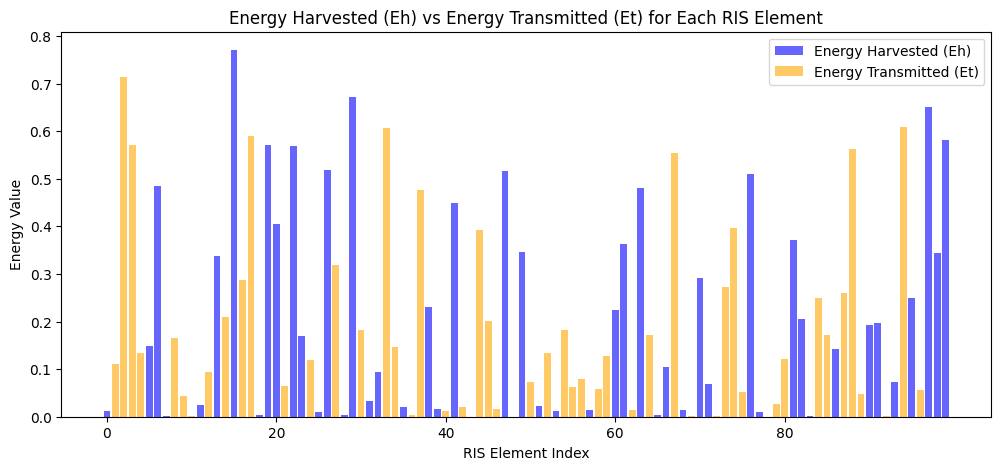

In [167]:
import matplotlib.pyplot as plt

# Function to visualize Energy Harvested (Eh) vs Energy Transmitted (Et) for each RIS element
def visualize_energy_values(grouping):
    eh_values = [energy_harvested[i] if grouping[i] == 0 else 0 for i in range(NUMBER_OF_ELEMENTS)]
    et_values = [energy_transmitted[i] if grouping[i] == 1 else 0 for i in range(NUMBER_OF_ELEMENTS)]

    plt.figure(figsize=[12, 5])
    plt.bar(range(NUMBER_OF_ELEMENTS), eh_values, color='blue', alpha=0.6, label='Energy Harvested (Eh)')
    plt.bar(range(NUMBER_OF_ELEMENTS), et_values, color='orange', alpha=0.6, label='Energy Transmitted (Et)')
    plt.xlabel('RIS Element Index')
    plt.ylabel('Energy Value')
    plt.title('Energy Harvested (Eh) vs Energy Transmitted (Et) for Each RIS Element')
    plt.xticks(range(0, NUMBER_OF_ELEMENTS, 20))
    plt.legend()
    plt.show()

# Visualizing the Energy Harvested (Eh) and Energy Transmitted (Et) for each RIS element

# Extracting the et_group from the optimal solution's grouping
et_group_indices = [idx for idx, value in enumerate(optimal_solution.grouping) if value == 1]

# Calculating the SNR for the et_group
snr_et_group = sum([transmitted_snr_values[idx] for idx in et_group_indices])

# Printing the final SNR achieved by the et_group
print(f"Final SNR Achieved by Signal Transmission group at UT: {snr_et_group:.2f}")
visualize_energy_values(optimal_solution.grouping)
